Evalúa la relación calidad-precio. Los huéspedes valoran si lo que pagaron fue justo en comparación con lo que recibieron en términos de alojamiento, comodidades y experiencia general.

Review_scores_value
 - Tipo de dato
 - Cantidad de nulos
 - Cantidad de Vacios
 - Cantidad de datos unicos
 - Cantidad de datos totales

In [1]:
import pandas as pd

# Cargar únicamente la columna 'Review_scores_accuracy' del archivo CSV
file_path = "../0_Dataset/Listings.csv"
data = pd.read_csv(file_path, usecols=['review_scores_value'], delimiter=',', encoding='latin-1')

# Verificar si la columna 'Review_scores_accuracy' existe en el DataFrame
if 'review_scores_value' in data.columns:
    # Tipo de dato
    tipo_dato = data['review_scores_value'].dtype
    
    # Cantidad de nulos
    cantidad_nulos = data['review_scores_value'].isna().sum()
    
    # Cantidad de vacíos (considerando cadenas vacías)
    cantidad_vacios = (data['review_scores_value'] == '').sum()
    
    # Cantidad de datos únicos
    cantidad_unicos = data['review_scores_value'].nunique()
    
    # Cantidad de datos totales
    cantidad_totales = data['review_scores_value'].shape[0]
    
    # Imprimir resultados
    print(f"Columna 'review_scores_value':")
    print(f" - Tipo de dato: {tipo_dato}")
    print(f" - Cantidad de nulos: {cantidad_nulos}")
    print(f" - Cantidad de vacíos: {cantidad_vacios}")
    print(f" - Cantidad de datos únicos: {cantidad_unicos}")
    print(f" - Cantidad de datos totales: {cantidad_totales}")
else:
    print("La columna 'review_scores_value' no existe en el DataFrame.")

print(data['review_scores_value'].value_counts())
print(data['review_scores_value'].unique())

Columna 'review_scores_value':
 - Tipo de dato: float64
 - Cantidad de nulos: 91785
 - Cantidad de vacíos: 0
 - Cantidad de datos únicos: 9
 - Cantidad de datos totales: 279712
review_scores_value
10.0    102530
9.0      63670
8.0      14588
6.0       2602
7.0       2497
2.0       1095
4.0        605
5.0        306
3.0         34
Name: count, dtype: int64
[10.  9.  8.  6.  2.  7.  4. nan  5.  3.]


Analisis Cuantitaivo:
* Promedio
* Min
* Max
* Desviacion Estandar
* Q1
* Q2
* Q3
* Q4
* Mediana
* Kurtosis
* Skewness

In [2]:
# Cantidad de filas antes de aplicar dropna
total_antes = data['review_scores_value'].shape[0]

# Filtrar valores válidos
valores_validos = data['review_scores_value'].dropna()

# Cantidad de filas después de aplicar dropna
total_despues = valores_validos.shape[0]

# Calcular cuántos valores se dropearon
valores_dropeados = total_antes - total_despues

# Imprimir el resultado
print(f"Cantidad de valores eliminados (dropeados): {valores_dropeados}")

if not valores_validos.empty:
    # Cálculo de estadísticas sin transformar a escala relativa
    promedio = valores_validos.mean()
    minimo = valores_validos.min()
    maximo = valores_validos.max()
    desviacion = valores_validos.std()
    varianza = valores_validos.var()
    q1 = valores_validos.quantile(0.25)
    q2 = valores_validos.quantile(0.50)  # Mediana
    q3 = valores_validos.quantile(0.75)
    q4 = valores_validos.quantile(1.0)
    mediana = valores_validos.median()
    kurtosis = valores_validos.kurtosis()
    skewness = valores_validos.skew()

    # Mostrar resultados
    print("\nAnálisis Cuantitativo de 'review_scores_value':")
    print(f" - Promedio: {promedio:.2f}")
    print(f" - Mínimo: {minimo}")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Varianza: {varianza:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Q4 (100%): {q4}")
    print(f" - Mediana: {mediana}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar un análisis cuantitativo.")

Cantidad de valores eliminados (dropeados): 91785

Análisis Cuantitativo de 'review_scores_value':
 - Promedio: 9.34
 - Mínimo: 2.0
 - Máximo: 10.0
 - Desviación estándar: 1.04
 - Varianza: 1.09
 - Q1 (25%): 9.0
 - Q2 / Mediana (50%): 10.0
 - Q3 (75%): 10.0
 - Q4 (100%): 10.0
 - Mediana: 10.0
 - Curtosis (Kurtosis): 16.3045
 - Asimetría (Skewness): -3.2538


Grafica

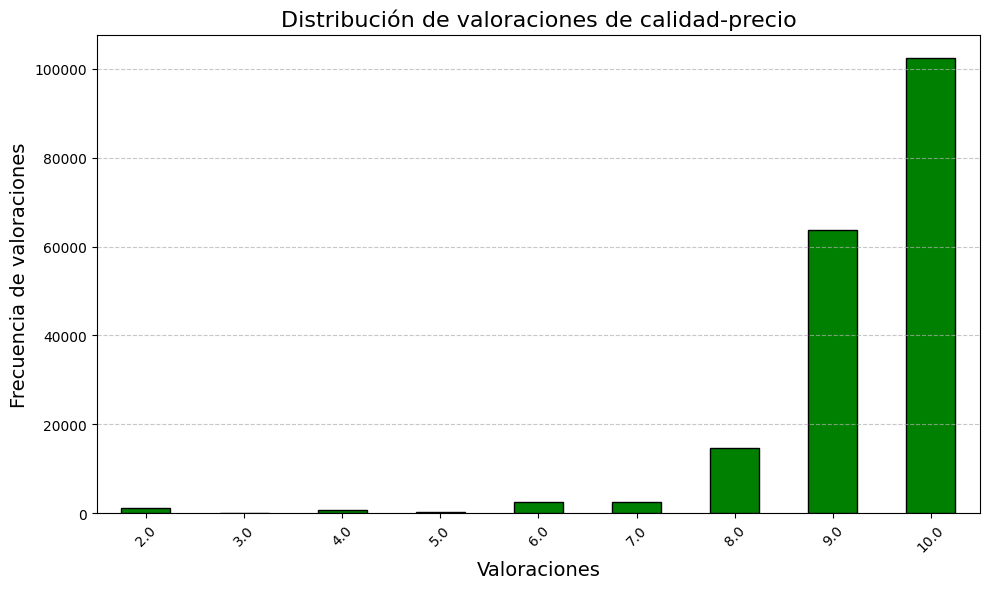

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Verificar si la columna 'review_scores_value' existe en el DataFrame
if 'review_scores_value' in data.columns:
    # Contar la frecuencia de cada valor y ordenar por índice (puntuación) de forma creciente
    value_counts = data['review_scores_value'].value_counts().sort_index()

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar', color='green', edgecolor='black')
    plt.title('Distribución de valoraciones de calidad-precio', fontsize=16)
    plt.xlabel('Valoraciones', fontsize=14)
    plt.ylabel('Frecuencia de valoraciones', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()
else:
    print("La columna 'review_scores_value' no existe en el DataFrame.")

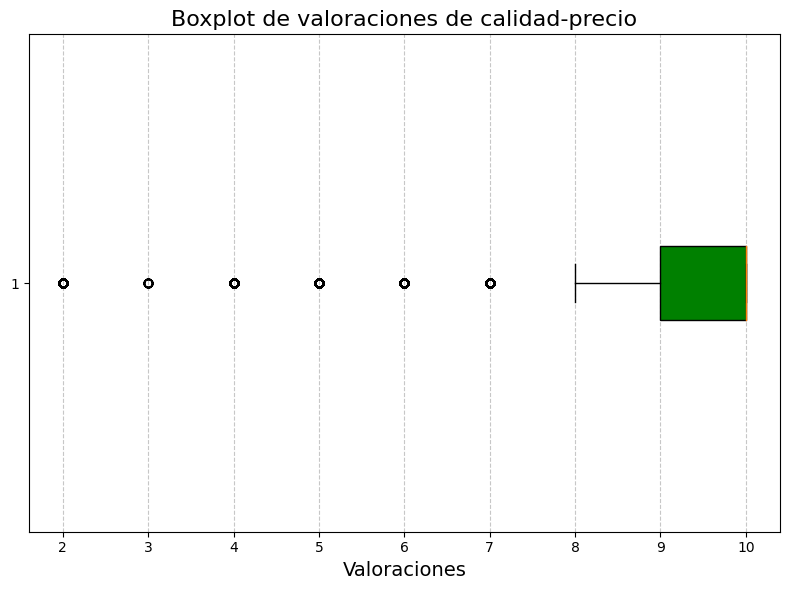

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar únicamente la columna 'review_scores_value' del archivo CSV


# Verificar si la columna 'review_scores_value' existe en el DataFrame
if 'review_scores_value' in data.columns:
    # Filtrar valores válidos (eliminar nulos)
    valores_validos = data['review_scores_value'].dropna()

    # Crear el gráfico boxplot
    plt.figure(figsize=(8, 6))
    plt.boxplot(valores_validos, vert=False, patch_artist=True, boxprops=dict(facecolor='green'))
    plt.title('Boxplot de valoraciones de calidad-precio', fontsize=16)
    plt.xlabel('Valoraciones', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'review_scores_value' no existe en el DataFrame.")